# Problem Statement
***We need to predict any movie box office collection using machine learning algorithm also we need to do proper feature engineering and selection also handle outliers and null values.***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datawrang as dw

In [2]:
df1 = pd.read_csv('bollywood_box_clean.csv')
df2 = pd.read_csv('movie_metadata.csv')

In [3]:
df1.head()

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,actors,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"21 February, 2020",21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"21 February, 2020",21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",A couple is trapped on an abandoned ship lying...


In [4]:
df2.head() #This is our hollywood dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
print(df1.shape)
print(df2.shape)

(130, 17)
(5043, 28)


In [6]:
df2.country.value_counts()

USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64

In [7]:
df1.columns

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'actors', 'movie_details'],
      dtype='object')

In [8]:
df1.drop(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total','movie_details','release_date'], axis = 1, inplace = True)

In [9]:
df1.head() #dropped columns

,movie_total_worldwide,movie_genre,movie_director,release_day,release_month,release_year,runtime,producer,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [10]:
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
df2.drop(['color', 'num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','movie_title', 'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews','content_rating', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],axis = 1, inplace = True) #dropping all other features.

In [13]:
df2.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,title_year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [14]:
df1.drop('producer', axis = 1 , inplace = True)

In [15]:
df1.head()

,movie_total_worldwide,movie_genre,movie_director,release_day,release_month,release_year,runtime,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [16]:
df2.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,title_year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [17]:
df2.rename(columns = {'director_name': 'Director','gross':'Boxoffice','title_year': 'year'}, inplace = True)

In [18]:
df1.rename(columns = {'movie_total_worldwide': 'Boxoffice','movie_genre': 'genres', 'runtime': 'duration'}, inplace = True)

In [19]:
df1.rename(columns = {'movie_director': 'Director','release_year': 'year'}, inplace = True)

In [20]:
df1.head()

,Boxoffice,genres,Director,release_day,release_month,year,duration,banner,actors
0,13.50,"Drama, Comedy",Homi Adajania,13,Mar,2020,145,"Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,137.00,Action,Ahmed Khan,6,Mar,2020,147,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,44.50,"Drama, Social",Anubhav Sinha,28,Feb,2020,142,"Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,86.39,"Comedy, Romance",Hitesh Kewalya,21,Feb,2020,120,"Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,40.94,Horror,Bhanu Pratap Singh,21,Feb,2020,117,"Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"


In [21]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,genres,actor_1_name,actor_3_name,language,country,year
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN


In [22]:
df2.genres.value_counts()

Drama                                         236
Comedy                                        209
Comedy|Drama                                  191
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Crime|Drama|Mystery|Sci-Fi|Thriller             1
Adventure|Comedy|Crime|Drama                    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Comedy|Crime|Horror                             1
Name: genres, Length: 914, dtype: int64

In [23]:
# Lets create new features. For hollywood
genre1 = df2.genres.str.split('|').str[0]
genre2 = df2.genres.str.split('|').str[1]
genre3 = df2.genres.str.split('|').str[2]

In [24]:
print(f'genere1 :- \n {genre1}')
print(f'genere2 :- \n {genre2}')
print(f'genere3 :- \n {genre3}')

genere1 :- 
 0            Action
1            Action
2            Action
3            Action
4       Documentary
           ...     
5038         Comedy
5039          Crime
5040          Drama
5041         Comedy
5042    Documentary
Name: genres, Length: 5043, dtype: object
genere2 :- 
 0       Adventure
1       Adventure
2       Adventure
3        Thriller
4             NaN
          ...    
5038        Drama
5039        Drama
5040       Horror
5041        Drama
5042          NaN
Name: genres, Length: 5043, dtype: object
genere3 :- 
 0        Fantasy
1        Fantasy
2       Thriller
3            NaN
4            NaN
          ...   
5038         NaN
5039     Mystery
5040    Thriller
5041     Romance
5042         NaN
Name: genres, Length: 5043, dtype: object


In [25]:
df2['genere1'] = genre1
df2['genere2'] = genre2

In [26]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,genres,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


In [27]:
# Lets create new features. For Bollywood
genre1 = df1.genres.str.split(',').str[0]
genre2 = df1.genres.str.split(',').str[1]
genre3 = df1.genres.str.split(',').str[2]

In [28]:
df1['genere1'] = genre1
df1['genere2'] = genre2

In [29]:
# Lets create new features. For Hollywoood and Bollywood
actor_1_name= df1.actors.str.split(',').str[0]
actor_2_name = df1.actors.str.split(',').str[1]
actor_3_name = df1.actors.str.split(',').str[2]
df1['actor_1_name'] = actor_1_name
df1['actor_2_name'] = actor_2_name
df1['actor_3_name'] = actor_3_name

In [30]:
#dropping other unecessary features.
df1.drop(['genres','release_day','release_month','banner','actors'], axis = 1, inplace = True)
df2.drop(['genres'], axis = 1, inplace = True)


In [31]:
df1.head() 

,Boxoffice,Director,year,duration,genere1,genere2,actor_1_name,actor_2_name,actor_3_name
0,13.50,Homi Adajania,2020,145,Drama,Comedy,Irrfan Khan,Radhika Madan,Kareena Kapoor
1,137.00,Ahmed Khan,2020,147,Action,NaN,Tiger Shroff,Shraddha Kapoor,Riteish Deshmukh
2,44.50,Anubhav Sinha,2020,142,Drama,Social,Taapsee Pannu,Pavail Gulati,Dia Mirza
3,86.39,Hitesh Kewalya,2020,120,Comedy,Romance,Ayushman Khurana,Jitendra Kumar,Gajraj Rao
4,40.94,Bhanu Pratap Singh,2020,117,Horror,NaN,Vicky Kaushal,Bhumi Pednekar,Ashutosh Rana


In [32]:
df2.head()

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


# Lets create new features

In [33]:
df2.head() # As you can see we have features like country and language which are not present in our bollywood dataset we will add that

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


In [34]:
df1['country'] = 'IN'
df1['language'] = 'Hindi'

In [35]:
df1.head() #Bollywood Dataset

,Boxoffice,Director,year,duration,genere1,genere2,actor_1_name,actor_2_name,actor_3_name,country,language
0,13.50,Homi Adajania,2020,145,Drama,Comedy,Irrfan Khan,Radhika Madan,Kareena Kapoor,IN,Hindi
1,137.00,Ahmed Khan,2020,147,Action,NaN,Tiger Shroff,Shraddha Kapoor,Riteish Deshmukh,IN,Hindi
2,44.50,Anubhav Sinha,2020,142,Drama,Social,Taapsee Pannu,Pavail Gulati,Dia Mirza,IN,Hindi
3,86.39,Hitesh Kewalya,2020,120,Comedy,Romance,Ayushman Khurana,Jitendra Kumar,Gajraj Rao,IN,Hindi
4,40.94,Bhanu Pratap Singh,2020,117,Horror,NaN,Vicky Kaushal,Bhumi Pednekar,Ashutosh Rana,IN,Hindi


In [36]:
df2.head() #hollywood Dataset

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2
0,James Cameron,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN


## Day 2 

# LETS DO EDA

In [37]:
dfbolly = df1
dfholly = df2

In [38]:
dfholly['Boxoffice'] = dfholly['Boxoffice']/10000000 # to convert values into 10 million format or 1crore.

In [39]:
final_df = pd.concat([dfholly,dfbolly], ignore_index = True, axis = 0)

In [40]:
final_df['country'].value_counts()

USA              3807
UK                448
France            154
IN                130
Canada            126
                 ... 
Official site       1
Soviet Union        1
Chile               1
Peru                1
Panama              1
Name: country, Length: 66, dtype: int64

# Handle Missing Values

In [41]:
final_df.isnull().mean() #percentage of missing value 

Director        0.020104
duration        0.002900
actor_2_name    0.003480
Boxoffice       0.170887
actor_1_name    0.002126
actor_3_name    0.005799
language        0.002320
country         0.000967
year            0.020878
genere1         0.000193
genere2         0.134351
dtype: float64

<AxesSubplot:>

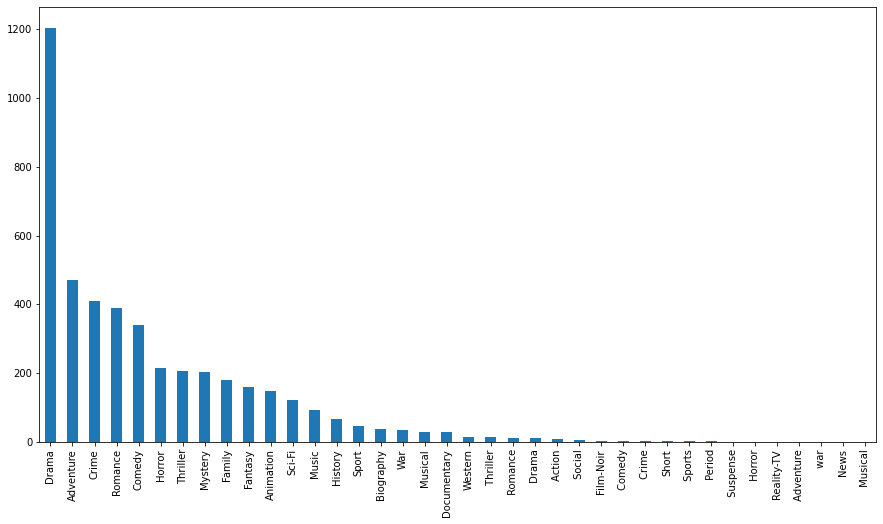

In [42]:
fig = plt.subplots(figsize=(15,8))
final_df['genere2'].value_counts().plot(kind = 'bar')

In [43]:
dw.Capture_NaN(dataframe = final_df, feature = 'genere2')
dw.Capture_NaN(dataframe = final_df, feature = 'genere1')

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0,0
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,Omung Kumar,135.0,Aditi Rao Hydari,15.680000,Sanjay Dutt,Sharad Kelkar,Hindi,IN,2017.0,Drama,NaN,1,0
5169,Apoorva Lakhia,124.0,Siddhanth Kapoor,9.000000,Shraddha Kapoor,Ankur Bhatia,Hindi,IN,2017.0,Biographical,Crime,0,0
5170,Ranjit Tiwari,147.0,Diana Penty,16.950000,Farhan Akhtar,Deepak Dobriyal,Hindi,IN,2017.0,Thriller,NaN,1,0
5171,Hansal Mehta,124.0,Sohum Shah,27.690000,Kangana Ranaut,Rupinder Nagra,Hindi,IN,2017.0,Drama,NaN,1,0


In [44]:
final_df

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.0,Action,Adventure,0,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.0,Action,Adventure,0,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.0,Action,Adventure,0,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.0,Action,Thriller,0,0
4,Doug Walker,NaN,Rob Walker,NaN,Doug Walker,NaN,NaN,NaN,NaN,Documentary,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,Omung Kumar,135.0,Aditi Rao Hydari,15.680000,Sanjay Dutt,Sharad Kelkar,Hindi,IN,2017.0,Drama,NaN,1,0
5169,Apoorva Lakhia,124.0,Siddhanth Kapoor,9.000000,Shraddha Kapoor,Ankur Bhatia,Hindi,IN,2017.0,Biographical,Crime,0,0
5170,Ranjit Tiwari,147.0,Diana Penty,16.950000,Farhan Akhtar,Deepak Dobriyal,Hindi,IN,2017.0,Thriller,NaN,1,0
5171,Hansal Mehta,124.0,Sohum Shah,27.690000,Kangana Ranaut,Rupinder Nagra,Hindi,IN,2017.0,Drama,NaN,1,0


In [45]:
final_df['genere2'].fillna('Missing',inplace = True) # replacing All NaN values in genere2 with 'MISSING'

In [46]:
final_df.isnull().mean() #after removing null values

Director           0.020104
duration           0.002900
actor_2_name       0.003480
Boxoffice          0.170887
actor_1_name       0.002126
actor_3_name       0.005799
language           0.002320
country            0.000967
year               0.020878
genere1            0.000193
genere2            0.000000
genere2_Capture    0.000000
genere1_Capture    0.000000
dtype: float64

<AxesSubplot:>

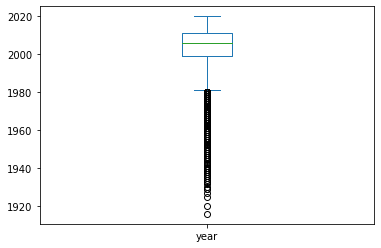

In [47]:
final_df['year'].plot(kind='box')

In [48]:
final_df['country'].fillna('None',inplace = True) # replacing All NaN values in genere2 with 'None'
final_df['actor_2_name'].fillna('unknown',inplace = True) # replacing All NaN values in actor_2_name with 'unknown'
final_df['actor_3_name'].fillna('unknown',inplace = True) # replacing All NaN values in actor_3_name with 'unknown'
final_df['actor_1_name'].fillna('unknown',inplace = True) # replacing All NaN values in actor_3_name with 'unknown'
final_df['Director'].fillna('Not Known',inplace = True) # replacing All NaN values in actor_3_name with 'unknown'



In [49]:
final_df.shape

(5173, 13)

In [50]:
final_df.isnull().sum()

Director             0
duration            15
actor_2_name         0
Boxoffice          884
actor_1_name         0
actor_3_name         0
language            12
country              0
year               108
genere1              1
genere2              0
genere2_Capture      0
genere1_Capture      0
dtype: int64

In [51]:
mean = final_df['year'].mean()
final_df['year'].fillna(mean, inplace = True)

In [52]:
# Now I will Replace All Nan Values of language on the basis of country and if country is not there i will replace it with new
# element
df2 = final_df.loc[final_df['language'].isnull()].iloc[:,6:8]
df2

,language,country
4,NaN,None
279,NaN,None
2459,NaN,USA
3086,NaN,USA
3539,NaN,USA
3869,NaN,USA
4110,NaN,USA
4409,NaN,USA
4630,NaN,USA
4810,NaN,USA


In [53]:
df2.country.value_counts()

USA     10
None     2
Name: country, dtype: int64

# We will replace the none value of country by checking the actor names.

In [54]:
index_nan_usa = final_df.loc[(final_df['country'] == 'USA') & (final_df['language'].isnull())]['language'].index
index_nan_usa

Int64Index([2459, 3086, 3539, 3869, 4110, 4409, 4630, 4810, 4885, 4958], dtype='int64')

In [55]:
for index in index_nan_usa:
    final_df['language'][index] = 'English'

In [56]:
final_df.isnull().sum()

Director             0
duration            15
actor_2_name         0
Boxoffice          884
actor_1_name         0
actor_3_name         0
language             2
country              0
year                 0
genere1              1
genere2              0
genere2_Capture      0
genere1_Capture      0
dtype: int64

In [57]:
index_nan_None = final_df.loc[(final_df['country'] == 'None') & (final_df['language'].isnull())]

In [58]:
# Douglas Darien Walker is an American film critic
# Mathew Buck is also from england which means both languages will be english
index_nan_None=index_nan_None.index
for i in index_nan_None:
    final_df['language'][i] = 'English'

In [59]:
final_df.isnull().sum()

Director             0
duration            15
actor_2_name         0
Boxoffice          884
actor_1_name         0
actor_3_name         0
language             0
country              0
year                 0
genere1              1
genere2              0
genere2_Capture      0
genere1_Capture      0
dtype: int64

In [60]:
mode = final_df['duration'].mode()[0]
final_df['duration'].fillna(mode,inplace = True)

In [61]:
final_df.isnull().sum()

Director             0
duration             0
actor_2_name         0
Boxoffice          884
actor_1_name         0
actor_3_name         0
language             0
country              0
year                 0
genere1              1
genere2              0
genere2_Capture      0
genere1_Capture      0
dtype: int64

In [62]:
final_df['genere1'].fillna('Missing',inplace = True)

In [63]:
final_df.shape

(5173, 13)

In [64]:
final_df['year'].sort_values(ascending = False).unique()

array([2020.        , 2019.        , 2018.        , 2017.        ,
       2016.        , 2015.        , 2014.        , 2013.        ,
       2012.        , 2011.        , 2010.        , 2009.        ,
       2008.        , 2007.        , 2006.        , 2005.        ,
       2004.        , 2003.        , 2002.88075025, 2002.        ,
       2001.        , 2000.        , 1999.        , 1998.        ,
       1997.        , 1996.        , 1995.        , 1994.        ,
       1993.        , 1992.        , 1991.        , 1990.        ,
       1989.        , 1988.        , 1987.        , 1986.        ,
       1985.        , 1984.        , 1983.        , 1982.        ,
       1981.        , 1980.        , 1979.        , 1978.        ,
       1977.        , 1976.        , 1975.        , 1974.        ,
       1973.        , 1972.        , 1971.        , 1970.        ,
       1969.        , 1968.        , 1967.        , 1966.        ,
       1965.        , 1964.        , 1963.        , 1962.     

<AxesSubplot:>

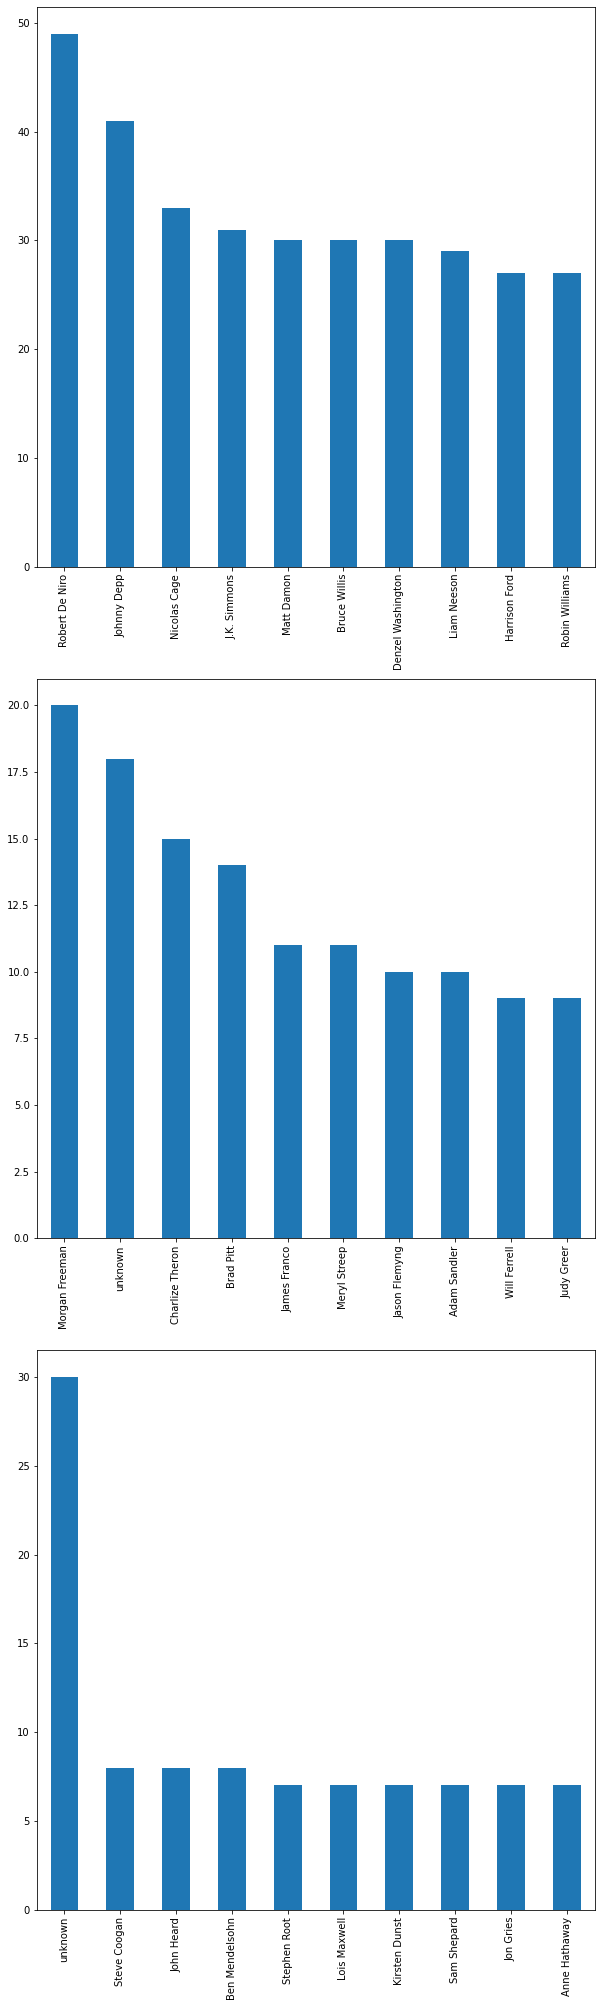

In [65]:
fig, ax = plt.subplots(3,1, figsize = (10,35))
#Value Counts
final_df['actor_1_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[0])
final_df['actor_2_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[1])
final_df['actor_3_name'].value_counts()[:10].plot(kind = 'bar', ax = ax[2])


<AxesSubplot:>

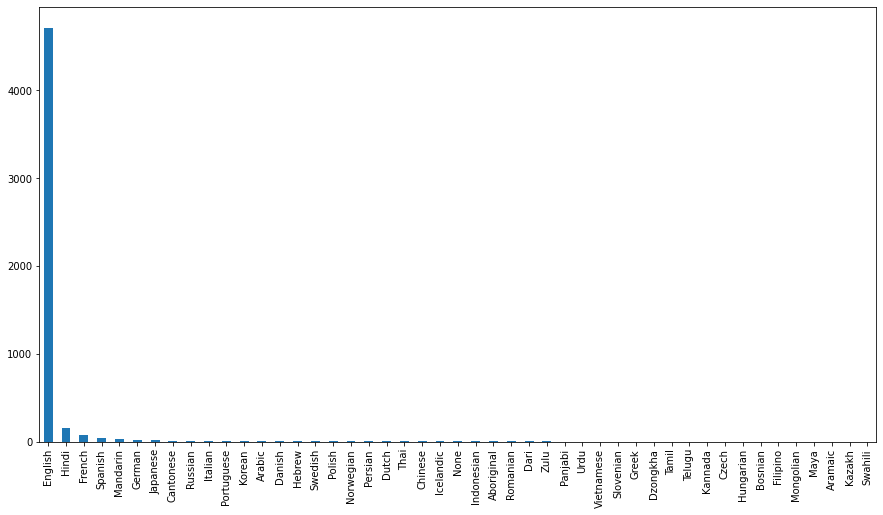

In [66]:
fig = plt.subplots(figsize = (15,8))
final_df['language'].value_counts().plot(kind = 'bar')

In [67]:
final_df.language.value_counts()

English       4716
Hindi          158
French          73
Spanish         40
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [68]:
final_df.head()

,Director,duration,actor_2_name,Boxoffice,actor_1_name,actor_3_name,language,country,year,genere1,genere2,genere2_Capture,genere1_Capture
0,James Cameron,178.0,Joel David Moore,76.050585,CCH Pounder,Wes Studi,English,USA,2009.00000,Action,Adventure,0,0
1,Gore Verbinski,169.0,Orlando Bloom,30.940415,Johnny Depp,Jack Davenport,English,USA,2007.00000,Action,Adventure,0,0
2,Sam Mendes,148.0,Rory Kinnear,20.007417,Christoph Waltz,Stephanie Sigman,English,UK,2015.00000,Action,Adventure,0,0
3,Christopher Nolan,164.0,Christian Bale,44.813064,Tom Hardy,Joseph Gordon-Levitt,English,USA,2012.00000,Action,Thriller,0,0
4,Doug Walker,90.0,Rob Walker,NaN,Doug Walker,unknown,English,None,2002.88075,Documentary,Missing,1,0


<AxesSubplot:xlabel='genere1', ylabel='Boxoffice'>

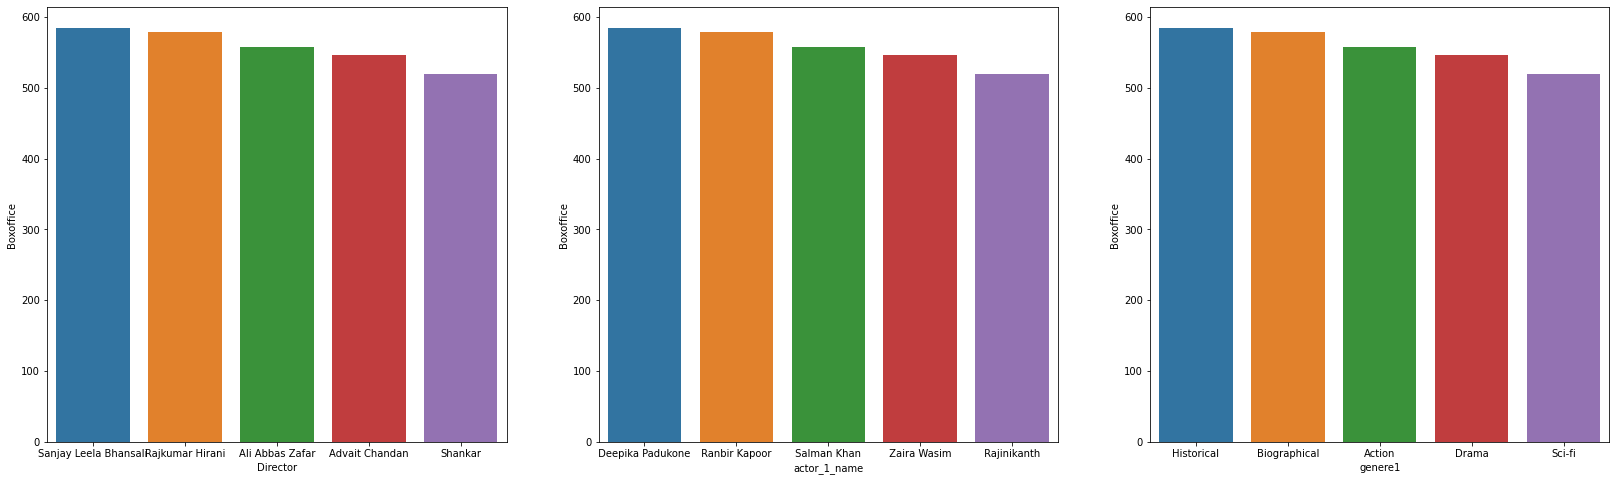

In [69]:
fig, ax = plt.subplots(1,3, figsize = (28,8))
sns.barplot(x = 'Director', y = 'Boxoffice', ax = ax[0], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])
sns.barplot(x = 'actor_1_name', y = 'Boxoffice', ax = ax[1], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])
sns.barplot(x = 'genere1', y = 'Boxoffice', ax = ax[2], data = final_df.sort_values(by='Boxoffice', ascending = False)[:5])

## Which Director Is getting more hits ?
1.Sanjay Leela Bhansali
## Which Genere is most famous.
1.Historical

### Which Actors Are Doing Most Amount Of Movies. ?

<AxesSubplot:>

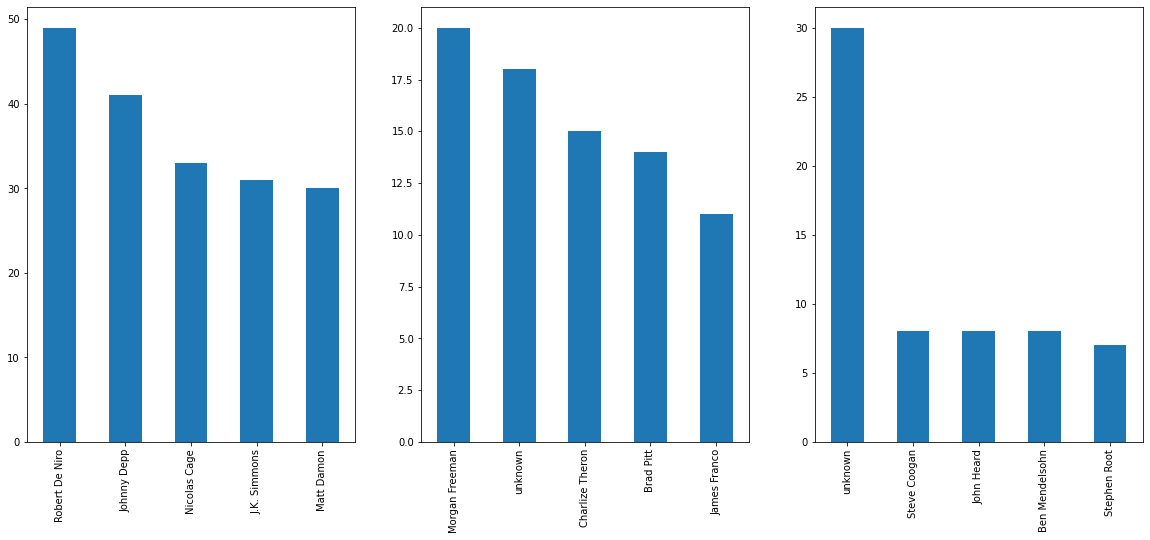

In [70]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
final_df['actor_1_name'].value_counts()[:5].plot(kind = 'bar', ax = ax[0]) # Top 5 Actors Who are doing most amount of movies
final_df['actor_2_name'].value_counts()[:5].plot(kind = 'bar',ax = ax[1]) # Top 5 Actors Who are doing most amount of movies
final_df['actor_3_name'].value_counts()[:5].plot(kind = 'bar',ax = ax[2]) # Top 5 Actors Who are doing most amount of movies


<AxesSubplot:ylabel='country'>

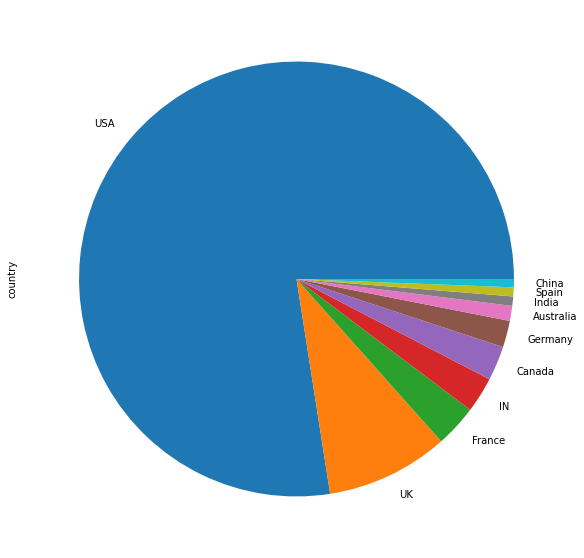

In [71]:
fig = plt.subplots(figsize = (15,10))
final_df.country.value_counts()[:10].plot(kind = 'pie')
# This is only for hollywood dataset. Because india data was also less and it was combined.

In [72]:
# We need to replace India With IN. and later on we will do label encoding in it.

In [73]:
final_df.country.replace({'India': 'IN'},regex=True,inplace = True) # Renaming India To IN
final_df.country.value_counts()

USA              3807
UK                448
IN                164
France            154
Canada            126
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 66, dtype: int64

# Top Countries

([<matplotlib.patches.Wedge at 0x1ebeef4abe0>,
 [Text(-0.9101233308511506, 0.617798933829128, 'USA'),
  Text(0.6896105753805485, -0.8569931471857339, 'UK'),
  Text(0.9736333170518435, -0.511896634025488, 'IN'),
  Text(1.0597250084535836, -0.2949286463842602, 'France'),
  Text(1.0960993609153111, -0.0925537195419334, 'Canada')],
 [Text(-0.49643090773699117, 0.3369812366340698, '81%'),
  Text(0.3761512229348446, -0.46745080755585483, '10%'),
  Text(0.5310727183919146, -0.2792163458320844, '3%'),
  Text(0.5780318227928638, -0.160870170755051, '3%'),
  Text(0.5978723786810787, -0.05048384702287275, '3%')])

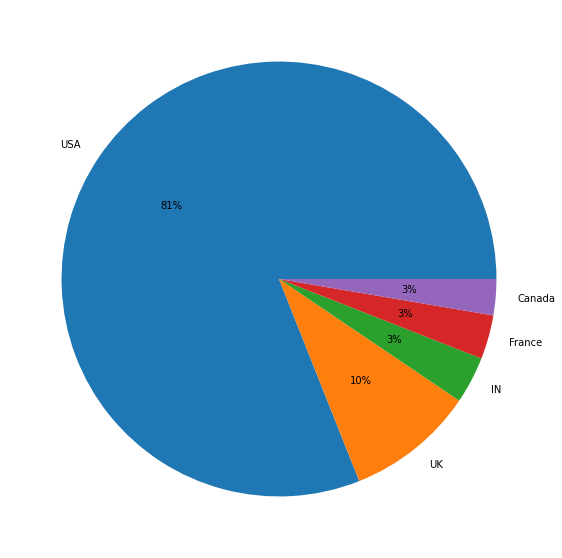

In [74]:
fig = plt.subplots(figsize = (15,10))
plt.pie(final_df['country'].value_counts()[:5],labels = final_df['country'].value_counts().index[:5], autopct='%1.0f%%')

In [75]:
final_df.dtypes

Director            object
duration           float64
actor_2_name        object
Boxoffice          float64
actor_1_name        object
actor_3_name        object
language            object
country             object
year               float64
genere1             object
genere2             object
genere2_Capture      int32
genere1_Capture      int32
dtype: object

In [76]:
dw.Find_Categorical_col(final_df) # it actually returns all real categorical features.

['duration',
 'year',
 'genere2_Capture',
 'genere1_Capture',
 'language',
 'country',
 'genere1',
 'genere2']

In [77]:
final_df.actor_3_name.value_counts()

unknown                 30
Steve Coogan             8
John Heard               8
Ben Mendelsohn           8
Stephen Root             7
                        ..
Toby Hemingway           1
John Patrick Amedori     1
Jake Short               1
Emily Meade              1
 Shreyas Talpade         1
Name: actor_3_name, Length: 3626, dtype: int64

 **I will be Creating a group of directors on the basis of boxoffice collection.**


In [78]:
bins = [0,100,200,300,400,500]
labels =  ['Fine','Good','Hit','MegaHit','BlockBusterHit']
collections = pd.cut(final_df['Boxoffice'], bins, labels = labels)
collections.value_counts()


Fine              4226
Good                25
Hit                  8
MegaHit              7
BlockBusterHit       2
Name: Boxoffice, dtype: int64

In [86]:
collections = collections.values.add_categories('missing')

In [87]:
collections.unique()

['Fine', NaN, 'Good', 'MegaHit', 'Hit', 'BlockBusterHit']
Categories (6, object): ['Fine' < 'Good' < 'Hit' < 'MegaHit' < 'BlockBusterHit' < 'missing']

In [88]:
final_df['Box_categories'] = collections

In [89]:
final_df['Box_categories'].isnull().sum()

905

In [90]:
final_df['Box_categories'].value_counts()

Fine              4226
Good                25
Hit                  8
MegaHit              7
BlockBusterHit       2
missing              0
Name: Box_categories, dtype: int64

In [91]:
final_df['Box_categories'].fillna('missing',inplace = True)

In [92]:
final_df.isnull().sum()

Director             0
duration             0
actor_2_name         0
Boxoffice          884
actor_1_name         0
actor_3_name         0
language             0
country              0
year                 0
genere1              0
genere2              0
genere2_Capture      0
genere1_Capture      0
Box_categories       0
dtype: int64

# Day 3

# Lets do encoding.

In [ ]:
index_main = list(final_df.columns)
index_main.remove('Boxoffice')
X = final_df[index_main]
y = final_df['Boxoffice']

In [ ]:
X.columns

# Before doing any encoding its important to do train test split.

In [ ]:
# Before doing any encoding its important to do train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# One hot encoding for multi category features.

**i am changing the code from the old to new one because of some reasons we need to do some more eda to find out solutions for better accuracy which we are not able to achieve.**

In [ ]:
final_df.language.value_counts()